In [ ]:
# Calling arima and sarima from Python to R via PypeR
# r_ArimaFxn takes 2 secs to run
# r_SarimaFxn takes about 9 mins to run
# Install RStudio
# install.packages("forecast") inside RStudio

In [1]:
# -------------------------------------
# Run Arima & Sarima for EU/AMR paid/not paid
# -------------------------------------

import pandas as pd
data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_Paid_Spend_20190122.csv')
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_Paid_Spend_20190122.csv')
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_NotPaid_20190122.csv')
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_NotPaid_20190122.csv')
data = data[['Date', 'Net Bookings', 'Spend Amount USD']]
#data = data[['Date', 'NB']]
data.columns = ['ds', 'y', 'aws']
#data.columns = ['ds', 'y']
data.head()

,ds,y,aws
0,1/1/16,817,61842
1,1/2/16,1119,79724
2,1/3/16,1429,89523
3,1/4/16,1562,84218
4,1/5/16,1696,89471


In [2]:
data.shape

(1118, 3)

In [3]:
import pandas as pd
import pyper as pr

def r_ArimaFxn(data, fcstdays):
    #X = data['nb']
    r = pr.R()
    r.assign("rDF", data)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("model_order <- auto.arima(rDF$y, seasonal = T)")
    r("ts_data <- ts(rDF$y, start=2016,freq=365)")
    #r("summary(ts_data)")
    r("fit <- stlm(ts_data, modelfunction=Arima, order=arimaorder(model_order))")
    r("fit_arima_fc <- forecast(fit, h=h)")
    r("df_arima <- c(fit_arima_fc$fitted, fit_arima_fc$mean)")
    print(r.get("df_arima"))
    r_arima_series = pd.DataFrame(r.get("df_arima"))
    r_arima_series = r_arima_series[0].values
    #print(r_arima_series)
    return r_arima_series

In [4]:
amr_nb_notpaid_arima = r_ArimaFxn(data, 374)

[ 815.61387622 1642.83516518 1540.65088908 ... 7704.14679361 7566.50357583
 7442.13406956]


In [ ]:
amr_nb_notpaid_arima

In [67]:
amr_nb_notpaid_arima = pd.DataFrame(amr_nb_notpaid_arima)
amr_nb_notpaid_arima.to_csv("amr_nb_notpaid_arima.csv")

In [6]:
import pandas as pd
import pyper as pr

def r_SarimaFxn(data, fcstdays):
    #X = X['y'].values
    r = pr.R()
    r.assign("rDF", data)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("ts_data <- ts(rDF$y, start=2016,freq=365)")
    r("model_sorder <- auto.arima(ts_data, D=1)")
    r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
    r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
    r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
    r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
    r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
    r_sarima_series = pd.DataFrame(r.get("df_sarima"))
    r_sarima_series = r_sarima_series[0].values
    r_sarima_series = pd.Series(r_sarima_series)
    return r_sarima_series

In [7]:
amr_nb_paid_sarima = r_SarimaFxn(data, 374)
amr_nb_paid_sarima = pd.DataFrame(amr_nb_paid_sarima)
amr_nb_paid_sarima.to_csv("amr_nb_paid_sarima.csv")

In [12]:
# -------------------------------------
# Run Arima & Sarima for EU/AMR paid/not paid
# -------------------------------------

import pandas as pd
data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/agg_diff.csv')
data = data[['date', 'Diff', 'abs_Diff']]
#data.columns = ['ds', 'y', 'abs_Diff']
data.columns = ['ds', 'Diff', 'y']
data.head()

,ds,Diff,y
0,1/1/16,-8.662267,8.662267
1,1/2/16,369.998522,369.998522
2,1/3/16,1152.519472,1152.519472
3,1/4/16,641.806803,641.806803
4,1/5/16,715.038068,715.038068


In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

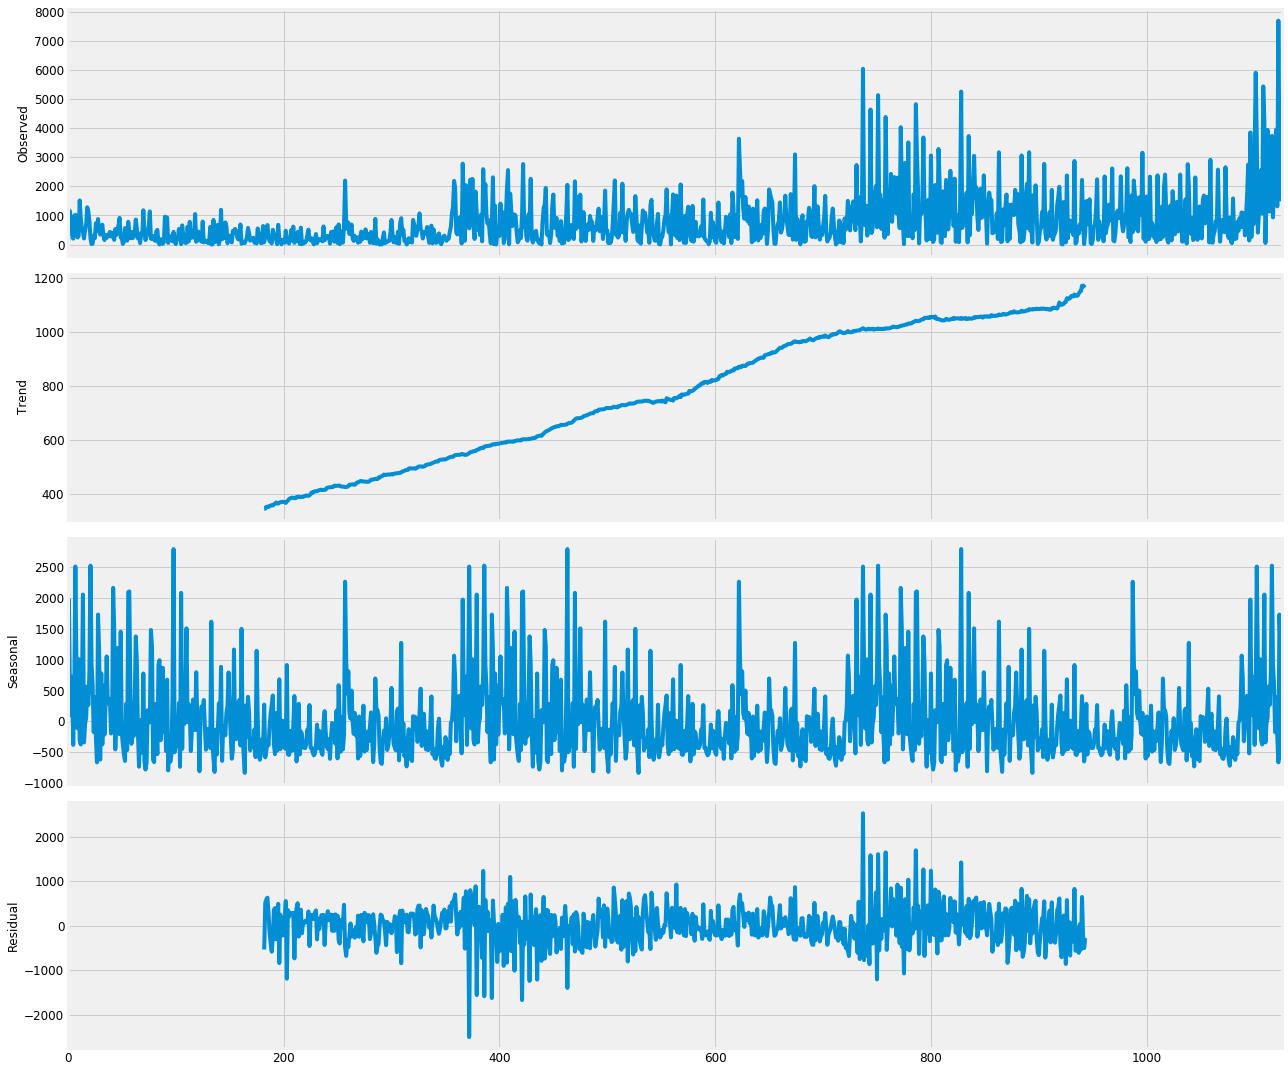

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

agg_diff_add = sm.tsa.seasonal_decompose(data['y'], model='additive', freq = 365)
fig = agg_diff_add.plot()
plt.show()

In [15]:
import pandas as pd
import pyper as pr

In [10]:
import pandas as pd
import pyper as pr

def r_ArimaFxn(data, fcstdays):
    #X = data['nb']
    r = pr.R()
    r.assign("rDF", data)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("model_order <- auto.arima(rDF$y, seasonal = T)")
    r("ts_data <- ts(rDF$y, start=2016,freq=365)")
    #r("summary(ts_data)")
    r("fit <- stlm(ts_data, modelfunction=Arima, order=arimaorder(model_order))")
    r("fit_arima_fc <- forecast(fit, h=h)")
    r("df_arima <- c(fit_arima_fc$fitted, fit_arima_fc$mean)")
    r_arima_series = pd.DataFrame(r.get("df_arima"))
    r_arima_series = r_arima_series[0].values
    #print(r_arima_series)
    return r_arima_series

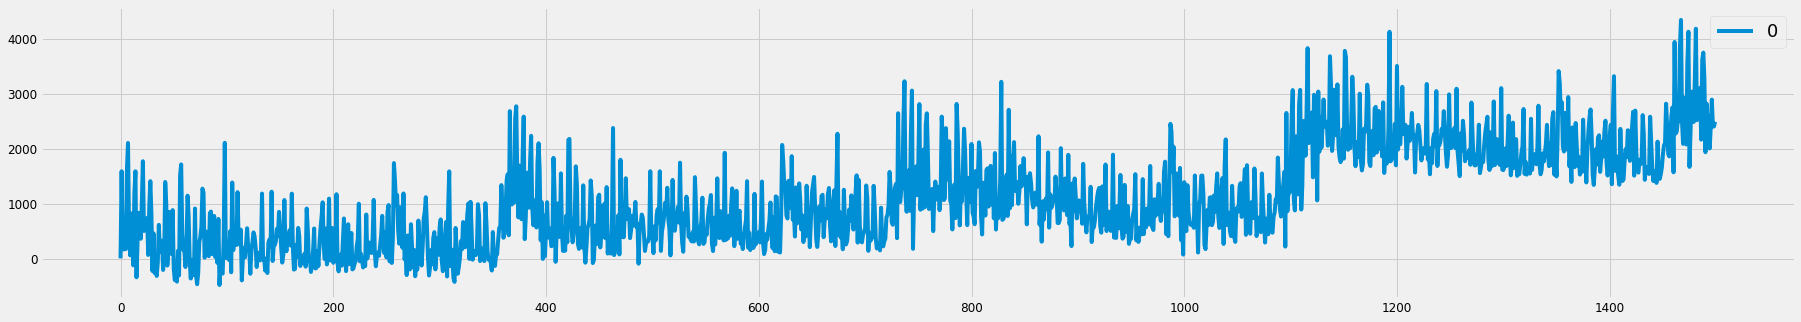

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] =28, 5
agg_diff_arima.plot()

In [41]:
import pandas as pd
import pyper as pr

def r_SarimaFxn(data, fcstdays):
    #X = X['y'].values
    r = pr.R()
    r.assign("rDF", data)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("ts_data <- ts(rDF$y, start=2016,freq=365)")
    r("model_sorder <- auto.arima(ts_data, D=1)")
    r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
    r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
    r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
    r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
    r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
    r_sarima_series = pd.DataFrame(r.get("df_sarima"))
    r_sarima_series = r_sarima_series[0].values
    r_sarima_series = pd.Series(r_sarima_series)
    return r_sarima_series

In [42]:
agg_diff_sarima = r_SarimaFxn(data, 374)
agg_diff_sarima = pd.DataFrame(agg_diff_sarima)
agg_diff_sarima.to_csv("agg_abs_diff_sarima.csv")

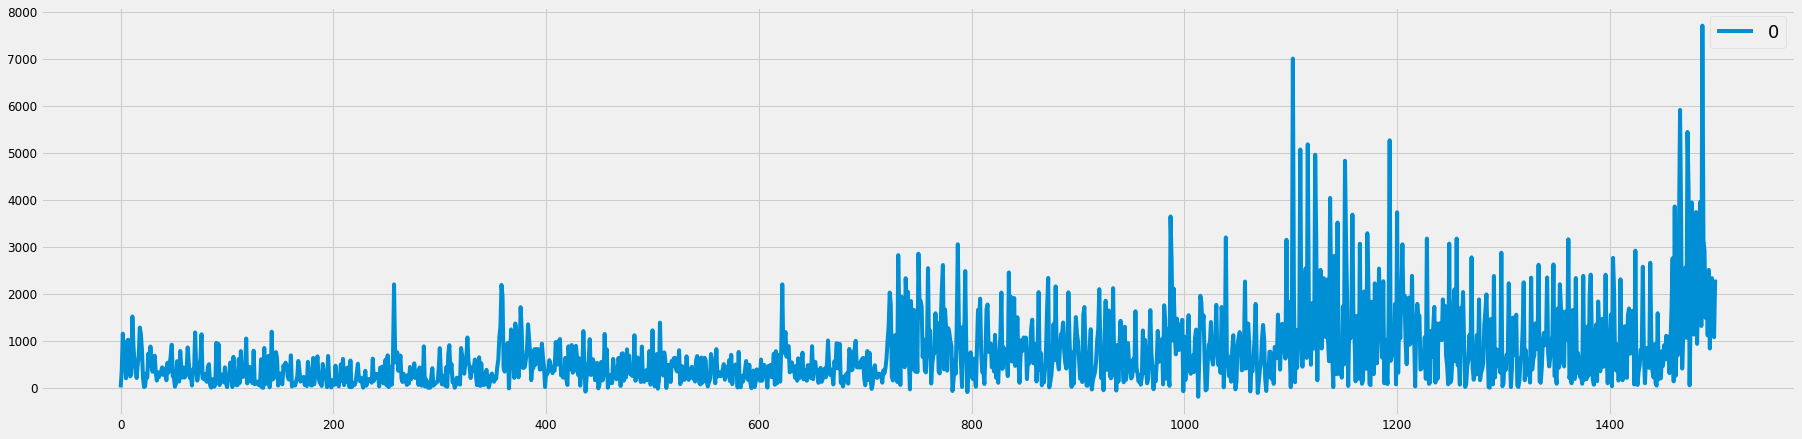

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] =28, 7
agg_diff_sarima.plot()

In [ ]:
# HW from Py to R

In [20]:
import pandas as pd
import pyper as pr

def r_HWFxn(df, fcstdays):
    r = pr.R()
    r.assign("rDF", df)
    r.assign("h", fcstdays)
    r("library(stats)")
    r("library(forecast)")
    r("ts_data <- ts(rDF$y, start=2016, freq=365)")
    r("fit <- HoltWinters(ts_data, seasonal = 'mult')")
    r("fit_hw_fc <- forecast(fit, h=h)")
    r("df_hw <- c(fit_hw_fc$fitted, fit_hw_fc$mean)")
    r_hw_series = pd.DataFrame(r.get("df_hw"))
    r_hw_series = r_hw_series[0].values
    r_hw_series = pd.Series(r_hw_series)
    return r_hw_series

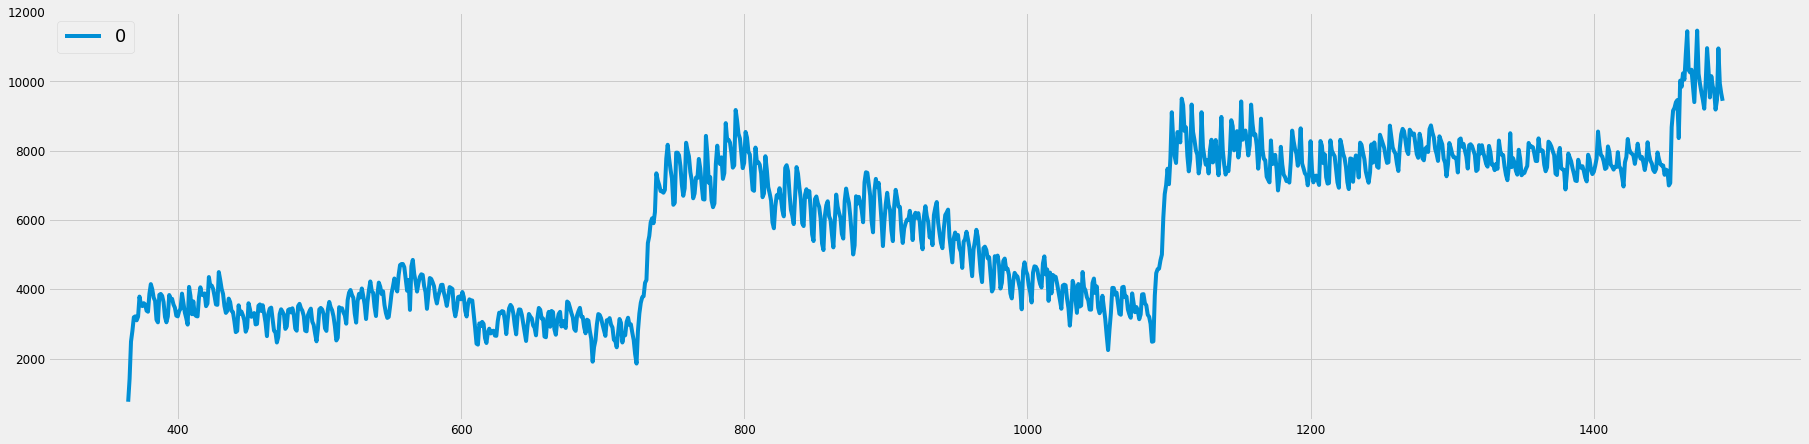

In [97]:
# add
amr_nb_paid_hw = r_HWFxn(data, 374)
amr_nb_paid_hw = pd.DataFrame(amr_nb_paid_hw)
amr_nb_paid_hw.plot()
amr_nb_paid_hw.to_csv("amr_nb_paid_hw.csv")

In [5]:
import pandas as pd
#data = pd.read_csv('All_data_Jan19_DOW.csv')  # All Data, sundays, mondays
#data = pd.read_csv('All_data_1124_DOW.csv')
data = pd.read_csv('All_data_Jan19_1130_DOW.csv')

data.shape
data.head()

,ds,visits,listings,y,dow,mon,year,Sunday,Monday
0,1/1/16,2293712,28296771,7507,6,1,2016,0,0
1,1/2/16,2620436,28205540,9256,7,1,2016,0,0
2,1/3/16,3186849,28194192,11461,1,1,2016,1,0
3,1/4/16,3317763,28349902,12836,2,1,2016,0,1
4,1/5/16,3267402,28373795,13884,3,1,2016,0,0


In [8]:
data.tail()

,ds,visits,listings,y,dow,mon,year,Sunday,Monday
1060,11/26/18,2278387,3318784,14244,2,11,2018,0,1
1061,11/27/18,2197590,3473300,13329,3,11,2018,0,0
1062,11/28/18,2154169,3327606,13094,4,11,2018,0,0
1063,11/29/18,2145497,3329304,12359,5,11,2018,0,0
1064,11/30/18,1869143,3328204,11206,6,11,2018,0,0


In [ ]:
x_sarima_Jan19_1130_DOW = r_SarimaFxn(data, 374)
x_sarima_Jan19_1130_DOW.plot()
x_sarima_Jan19_1130_DOW = pd.DataFrame(x_sarima_Jan19_1130_DOW)
x_sarima_Jan19_1130_DOW.to_csv("x_sarima_Jan19_1130_DOW.csv")

In [ ]:
x_HW_Jan19_1130_DOW = r_HWFxn(data, 374)
x_HW_Jan19_1130_DOW.plot()
x_HW_Jan19_1130_DOW = pd.DataFrame(x_HW_Jan19_1130_DOW)
x_HW_Jan19_1130_DOW.to_csv("x_HW_Jan19_1130_DOW.csv")